# Clasificación del Carácter de Título según el Título de acuerdo a su casa de estudio y el Espacio Curricular
Este notebook utiliza el dataset limpio para predecir el Carácter del titulo, como Docente, Habilitante o Supletorio
según el titulo, la institución emisora (nombre) y el espacio curricular (desc_espacio), entrenando un modelo de Árbol de decisión

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns 

In [49]:
# Cargar el dataset
df = pd.read_csv('C:/Users/Usuario/OneDrive/Documentos/BASE_DE_DATOS_E_INTELIGENCIA_ARTIFICIAL/2025/APRENDIZAJE AUTOMATICO (2A1C)/PARCIAL/Clasificacion_Asignacion_DocentesTDF/data/processed/dataset_docentes_etl.csv')

In [50]:
# Definir variables predictoras y objetivo
X = df[['titulo', 'nombre', 'desc_espacio']]
y = df['caracter']

In [51]:
# One-hot encoding para las variables categóricas
X_encoded = pd.get_dummies(X)

In [52]:
# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

In [53]:
# Entrenar Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

In [54]:
print("Árbol de Decisión")
print(confusion_matrix(y_test, dt_preds))
print(classification_report(y_test, dt_preds))

Árbol de Decisión
[[3446  252  236]
 [ 231 3503  206]
 [ 375  395 1682]]
              precision    recall  f1-score   support

     Docente       0.85      0.88      0.86      3934
 Habilitante       0.84      0.89      0.87      3940
  Supletorio       0.79      0.69      0.74      2452

    accuracy                           0.84     10326
   macro avg       0.83      0.82      0.82     10326
weighted avg       0.83      0.84      0.83     10326



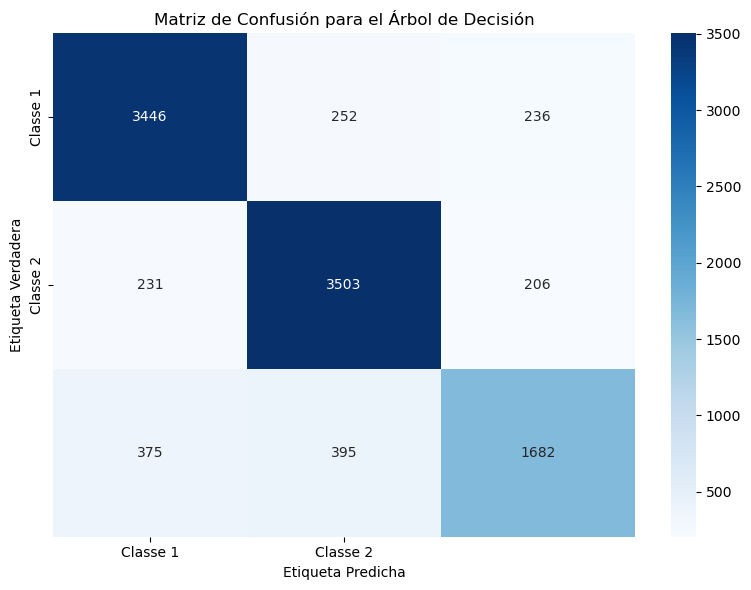

In [55]:
cm = confusion_matrix(y_test, dt_preds)
class_labels = ['Classe 1', 'Classe 2']
plt.figure(figsize=(8, 6)) # Ajusta el tamaño de la figura para mejor visibilidad
sns.heatmap(cm,
            annot=True,     # Mostrar los números en las celdas
            fmt='d',        # Formatear los números como enteros (d = decimal integer)
            cmap='Blues',   # Elegir un mapa de colores (Blues, YlGnBu, coolwarm, etc.)
            xticklabels=class_labels, # Etiquetas para el eje X (Predichas)
            yticklabels=class_labels  # Etiquetas para el eje Y (Verdaderas)
           )

plt.title('Matriz de Confusión para el Árbol de Decisión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.tight_layout() # Ajusta el layout para que no se superpongan los elementos
plt.show()


El reporte de Clasificación de este modelo indica que hay muy buen de precisión para la clasificación como docente y el de habilitante es bueno, en cambio para el caracter Supletorio, se puede decir que es aceptable comparado con el modelo de regresion logistica. En cuento a Recall, se c apta bien a los docentes reales ,y en este modelo captar mejor al habilitantes, y en el caso de los supletorios solo detecta al 69% de los supletorios reales (se le escapan muchos). En cuanto al F1Socre el de caracter docente tiene un Rendimiento sólido, en el caso del habilitantes tiene Muy buen resultado y el de supletorio es la clase más difícil de predecir. 
El  Accuracy total tiene 84% , Igual que el anterior, pero con menor rendimiento en Supletorio.
La matriz de confusión muestra cómo se clasificaron correctamente y incorrectamente las etiquetas en este modelo. La mayoría de las veces, las etiquetas de las clases predichas (Clase 1, Clase 2 y Etiqueta Verdadera) coinciden con las etiquetas verdaderas, como se observa en los valores en la diagonal de la matriz (3446, 3503 y 1682). Sin embargo, también hay errores en la clasificación, por ejemplo, algunas muestras de Clase 1 fueron clasificadas como Clase 2 (252), y algunas etiquetas verdaderas de la Clase 2 se clasificaron como Clase 1 (231). En general, el modelo parece tener un buen rendimiento, aunque todavía hay algunos errores en las clasificaciones.

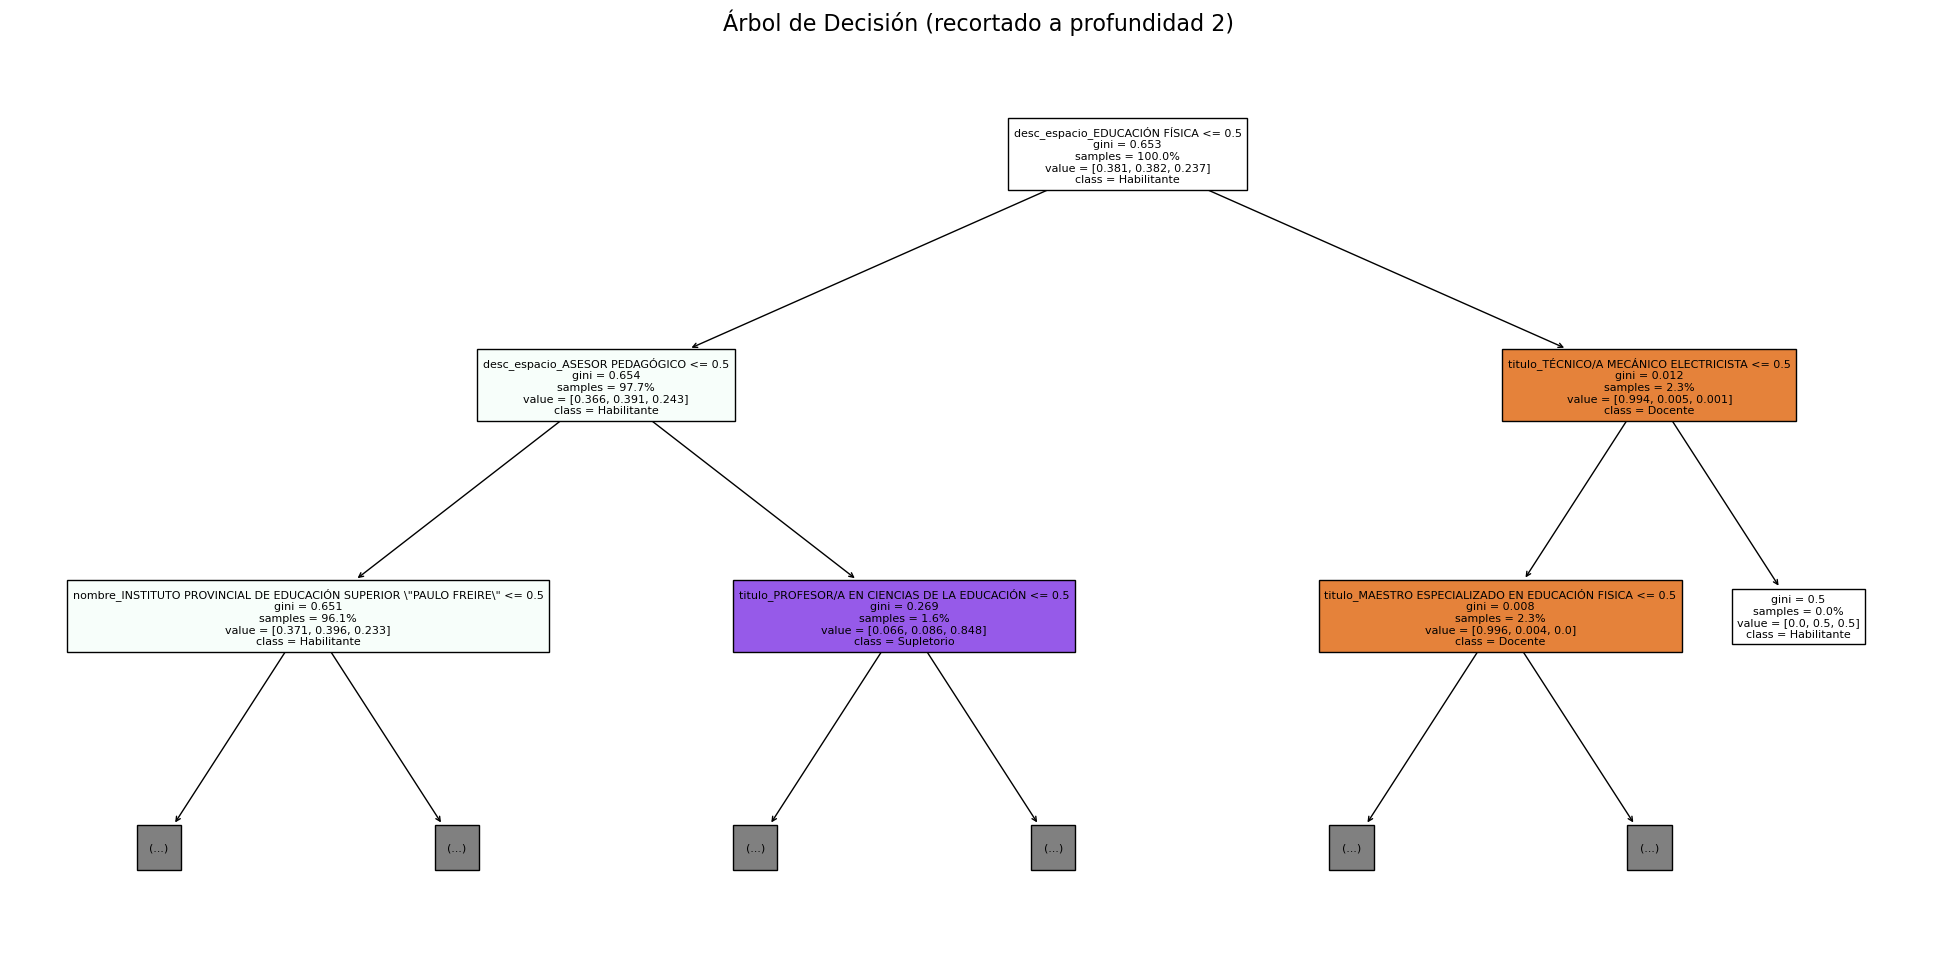

In [47]:
plt.figure(figsize=(25, 12))
plot_tree(dt_model,
          feature_names=X_encoded.columns,
          class_names=dt_model.classes_,
          filled=True,
          max_depth=2,
          fontsize=8,
          proportion=True
         )

plt.title("Árbol de Decisión (recortado a profundidad 2)",fontsize=16)
plt.show()

El árbol está intentando encontrar patrones en tus datos para clasificar el caracter de los docentes.
•	La primera y más fuerte división es si el docente está en el espacio EDUCACION FISICA.
•	Si NO está en EDUCACION FISICA, el árbol luego investiga si es 'ASESOR PEDAGOGICO' y si su título influye en que sea 'Suplente'.
•	Si SÍ está en EDUCACION FISICA, el árbol rápidamente predice 'Docente' a menos que tenga un título muy específico que lo desvíe (como el 'TECNICO/A MECANICO ELECTRICISTA', que parece ser un caso casi inexistente en tus datos).
Este gráfico te ayuda a entender cómo el modelo está tomando sus decisiones y cuáles características (espacios curriculares, títulos) son las más influyentes para determinar el 'caracter' de un docente en estos "espacios poco comunes".
